## Loading Original GLENet KITTI INFOS [IGNORE]
### Refer to GLENet here: https://github.com/Eaphan/GLENet

In [26]:
# import pickle
# import numpy as np
# from scipy import stats

# with open("/home/hpaat/my_exp/GLENet/data/kitti/github/kitti_infos_train.pkl", "rb") as fg:
#     infos_train_unc = pickle.load(fg)

# print(len(infos_train_unc))
# all_unc = infos_train_unc[0]['annos']['uncertainty']
# for item in infos_train_unc[1:]:
#     all_unc = np.concatenate((all_unc, item['annos']['uncertainty']), axis=0)
# print(all_unc.shape)

3712
(25099, 7)


In [27]:
# index = []
# for idx, item in enumerate(all_unc):
#     if (item==-1).sum() < 7:
#         index.append(idx)

# all_unc_final = all_unc[index]
# print(all_unc_final.shape)

(15654, 7)


In [28]:
# # Get mean per box parameter weight
# print(all_unc_final.mean(axis=0))
# # Get std per box parameter weight
# print(all_unc_final.std(axis=0))

[0.01803638 0.01261752 0.00428109 0.02579221 0.0011201  0.00179757
 0.01957782]


## Create Histogram Function

In [30]:
import matplotlib.pyplot as plt

def create_histogram(data, bins=10, xlabel='Value', ylabel='Frequency', title='Dist of Values'):

    # Create a histogram
    plt.hist(data, bins=bins, edgecolor='black')

    # Set plot labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Display the plot
    plt.show()

# for idx in range(7):
#     create_histogram(all_unc_final[:,idx], bins=100)

## MY OWN UNC with GLENET
## Add uncertainties to KITTI dbinfos and infos file

### kitti_dbinfos

In [31]:
dbinfos_path = "/home/hpaat/my_exp/GLENet/data/kitti/kitti_dbinfos_train_ori.pkl"        #/home/hpaat/my_exp/GLENet_v2/data/kitti/kitti_dbinfos_train_ori.pkl

with open(dbinfos_path, "rb") as fg:
    dbinfos_train_file = pickle.load(fg)

print(len(dbinfos_train_file['Car']))

# all_unc = infos_train_unc[0]['annos']['uncertainty']
# for item in infos_train_unc[1:]:
#     all_unc = np.concatenate((all_unc, item['annos']['uncertainty']), axis=0)
# print(all_unc.shape)

13419


In [32]:
print(dbinfos_train_file['Car'][0].keys())
print(len(dbinfos_train_file['Car']))

dict_keys(['name', 'path', 'image_idx', 'gt_idx', 'box3d_lidar', 'num_points_in_gt', 'difficulty', 'bbox', 'score'])
13419


### kitti_infos

In [33]:
infos_path = "/home/hpaat/my_exp/GLENet/data/kitti/kitti_infos_train_ori.pkl" # "/home/hpaat/my_exp/GLENet_v2/data/kitti/kitti_infos_train_ori.pkl"        #"/home/hpaat/my_exp/GLENet/data/kitti/kitti_infos_train_ori.pkl"

with open(infos_path, "rb") as fg:
    infos_train_file = pickle.load(fg)
 
print(len(infos_train_file))
# [0.0451523 , 0.01116733, 0.01491185, 0.08852343, 0.03435504, 0.01728673, 0.01341452]

3222


In [34]:
# print(infos_train_file[0]['annos']['uncertainty'])

In [35]:
# combined_array = []
# for i in range(len(infos_train_file)):
#     try: combined_array = np.concatenate((combined_array, infos_train_file[i]['annos']['uncertainty']), axis=0)
#     except: combined_array = infos_train_file[i]['annos']['uncertainty']

# epis = combined_array

## READ THE CONF FILES from MTrans-Evidential

In [36]:
# Load the training file
medlu_path = "/home/hpaat/my_exp/MTrans-evidential/output/evi_loss_only_levi_full_ldir_v19.03500.8.v11/conf/conf_299_val.pkl_genlabel_train.pkl"
mcdo_path = "/home/hpaat/my_exp/MTrans-evidential/output/MCDO/conf_train_d1-5.pkl"
ensemble_path = "/home/hpaat/my_exp/MTrans-evidential/output/Ensemble/conf_train_v20-24.pkl"
conf_mtrans_path = "/home/hpaat/my_exp/MTrans-evidential/output/vanilla_mtrans_v3/conf/conf_not_evi.pkl"
conf_path = medlu_path # "/home/hpaat/my_exp/MTrans-evidential/output/Ensemble/v20/conf_train_v20.pkl"

with open(conf_path, "rb") as fg:
    conf_file = pickle.load(fg)

try:
    print(conf_file.keys())
except:                             # if saved mcdo or ensemble variance pkl
    print(conf_file.shape)

dict_keys(['pred', 'target', 'conf', 'error', 'alea', 'beta', 'alpha', 'v', 'iou3d', 'var'])


In [37]:
# This block of code is for Evidential DL Output
# Define epistemic uncertainties
try:
    print("EDL output")
    alea = conf_file['alea']
    beta = conf_file['beta']
    alpha = conf_file['alpha']
    v = conf_file['v']
    if alpha is not None: 
        epis = beta / (v * (alpha - 1))
        confidence = np.sqrt(1. / ((alpha-1) * v)) 
except: 
    alpha = 1.0     # dummy_alpha
    print("MTrans pred iou output")
    epis = conf_file['pred_iou'].reshape(-1,1)
    iou3d = conf_file['iou3d']

    epis = np.tile(epis, (1, 7))

    print(epis.shape)

if alpha is None:
    # This block of code is for MCDO or Ensemble saved variance
    print("saved mcdo or ensemble output")
    epis = conf_file['var']
    #print(conf_file)

EDL output
saved mcdo or ensemble output


## Combine Train and Val to get DBINFOS TRAINVAL [Can Skip]

In [ ]:
medlu_path_1 = "/home/hpaat/my_exp/MTrans-evidential/output/evi_loss_only_levi_full_ldir_v19.03500.8.4.v2/conf/conf_299_val.pkl_genlabel_train.pkl"
medlu_path_2 = "/home/hpaat/my_exp/MTrans-evidential/output/evi_loss_only_levi_full_ldir_v19.03500.8.4.v2/conf/conf_299_val.pkl_genlabel_val.pkl"

with open(medlu_path_1, "rb") as fg1:
    conf_file_1 = pickle.load(fg1)

with open(medlu_path_2, "rb") as fg2:
    conf_file_2 = pickle.load(fg2)

beta_1 = conf_file_1['beta']
alpha_1 = conf_file_1['alpha']
v_1 = conf_file_1['v']
beta_2 = conf_file_2['beta']
alpha_2 = conf_file_2['alpha']
v_2 = conf_file_2['v']
if alpha_1 is not None: 
    epis_1 = beta_1 / (v_1 * (alpha_1 - 1)) 
    epis_2 = beta_2 / (v_2 * (alpha_2 - 1)) 

print(len(epis_1)) 
print(len(epis_2))

In [ ]:
# Get dbinfos trainval
combine_dbinfos = True

def func_combine_dbinfos(dbinfos_path_1, dbinfos_path_2, epis_1, epis_2):
    with open(dbinfos_path_1, "rb") as fg1:
        dbinfos_train_file_1 = pickle.load(fg1)
        # print(len(dbinfos_train_file_1['Car'])) --> 13419

    with open(dbinfos_path_2, "rb") as fg2:
        dbinfos_train_file_2 = pickle.load(fg2)
        # print(len(dbinfos_train_file_2['Car'])) --> 13726

    # Last values
    print(float(dbinfos_train_file_1['Car'][13418]['image_idx']))
    print(float(dbinfos_train_file_2['Car'][13725]['image_idx']))

    idx1, idx2 = 0, 0

    dbinfos_trainval_file = {}
    dbinfos_trainval_file['Car'] = []
    final_epis = np.zeros((1,7), dtype=np.float32)
    
    while idx2 < 13726:
        # print(idx1, idx2)
        if idx1 == 13419: # out of bounds for dbinfos_train_file_1
            dbinfos_trainval_file['Car'].append(dbinfos_train_file_2['Car'][idx2])
            final_epis = np.concatenate((final_epis, epis_2[idx2].reshape(1,-1)), axis=0)
            idx2 += 1
        elif float(dbinfos_train_file_1['Car'][idx1]['image_idx']) < float(dbinfos_train_file_2['Car'][idx2]['image_idx']):
            dbinfos_trainval_file['Car'].append(dbinfos_train_file_1['Car'][idx1])
            final_epis = np.concatenate((final_epis, epis_1[idx1].reshape(1,-1)), axis=0)
            idx1 += 1
        else:
            dbinfos_trainval_file['Car'].append(dbinfos_train_file_2['Car'][idx2])
            final_epis = np.concatenate((final_epis, epis_2[idx2].reshape(1,-1)), axis=0)
            idx2 += 1
    # dbinfos_trainval_file['Car'].append(dbinfos_train_file_2['Car'][idx2])
    final_epis = final_epis[1:,:]
    return dbinfos_trainval_file, final_epis

dbinfos_path_1 = "/home/hpaat/my_exp/GLENet/data/kitti/kitti_dbinfos_train_ori.pkl"
dbinfos_path_2 = "/home/hpaat/my_exp/GLENet/data/kitti/kitti_dbinfos_val_ori.pkl"
if combine_dbinfos:
    dbinfos_trainval_file, final_epis = func_combine_dbinfos(dbinfos_path_1, dbinfos_path_2, epis_1, epis_2)
    print(len(dbinfos_trainval_file['Car']))
    print(len(final_epis))

dbinfos_train_file, epis = dbinfos_trainval_file.copy(), final_epis.copy()

In [ ]:
print(dbinfos_trainval_file['Car'][0])

# Post-processing the Epistemic Uncertainties

In [38]:
# Sanity check on the shape and the uncertainties/pred_iou
print(epis.shape)

(13419, 7)


In [39]:
# Perform min-max scaling
if True:
    for idx in range(7):
        print(min(epis[:, idx]), end = "   ")
        print(max(epis[:, idx]), end = "   ")
        print(np.mean(epis[:, idx]))
        epis[:, idx] = (epis[:, idx]-min(epis[:, idx])) / (max(epis[:, idx]) - min(epis[:, idx]))       # + np.mean(epis[:, idx])*0.10      # + 5e-3   # + 1e-6

0.00032676602   17.303516   0.047058575
9.52866e-05   5.9202976   0.010072653
2.5281737e-05   0.04838821   0.00046251365
0.004445548   0.13323729   0.015948504
0.00061593164   0.016180212   0.0021663904
6.821677e-05   0.01055258   0.0006132895
0.9226947   2.1822832   1.3867042


In [40]:
# Set combine to True if you want to define the uncertainty as combination of epistemic and aleatoric uncertainty
combine= False
if combine:
    # Perform min-max scaling
    for idx in range(7):
        print(min(alea[:, idx]))
        print(max(alea[:, idx]))
        alea[:, idx] = (alea[:, idx]-min(alea[:, idx])) / (max(alea[:, idx]) - min(alea[:, idx])) + 1e-3

    epis = alea+epis

In [41]:
# Determine outliers and remove them    # IGNORE
remove_outlier = False
if remove_outlier:
    for idx in range(7):
        # Calculate quartiles
        q1 = np.percentile(epis[:, idx], 25) #25
        q3 = np.percentile(epis[:, idx], 95) #95

        # Calculate the IQR
        iqr = q3 - q1

        # Define the lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identify outliers
        outliers = [x for x in epis[:, idx] if x < lower_bound or x > upper_bound]

        # Print the outliers
        print("Outliers:", len(outliers))
        print((epis[:, idx]<lower_bound).sum())
        print(upper_bound, '\n')

        epis[:,idx][epis[:,idx]>upper_bound] = upper_bound

In [42]:
# Sanity check to see if there are zero-valued uncertainties
for i in range(7):
    print((epis[:,i]==0).sum(), end=" ")

1 1 1 1 1 1 1 

In [43]:
# Perform min-max scaling again after removing outliers
if True:
    for idx in range(7):
        #epis[:, idx] = (epis[:, idx]-min(epis[:, idx])) / (max(epis[:, idx]) - min(epis[:, idx]))# + 1e-6 #+ np.mean(epis[:, idx])*0.10 #+ 1e-3
        print(epis[:, idx][epis[:, idx]==0].shape, end="   ")
        epis[:, idx][epis[:, idx]==0] += min([i for i in epis[:, idx] if i>0])      # No zero values

(1,)   (1,)   (1,)   (1,)   (1,)   (1,)   (1,)   

In [44]:
# Get mean per box parameter weight
print("Mean and std")
print(epis.mean(axis=0))
print(epis.std(axis=0))
print()

print("Max and min")
print(epis.max(axis=0))
print(epis.min(axis=0))

Mean and std
[0.00270076 0.00168531 0.00904064 0.08931452 0.09961688 0.05198913
 0.36838192]
[0.03022946 0.02018968 0.0408501  0.0725564  0.07874776 0.07268206
 0.17581756]

Max and min
[1. 1. 1. 1. 1. 1. 1.]
[4.7023454e-07 9.8089220e-07 1.7774055e-05 1.2904310e-03 2.8731083e-03
 1.4399852e-03 1.2130669e-03]


In [45]:
# DUMMY SWEET IGNORE
# multiplier = []
# for num in epis.mean(axis=0):
#     multiplier.append(1/num)
# print(multiplier)

# for i in range(7):
#     epis[:,i] = multiplier[i] * epis[:,i]

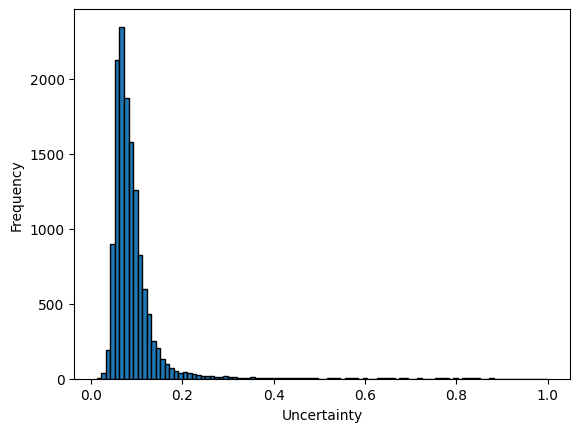

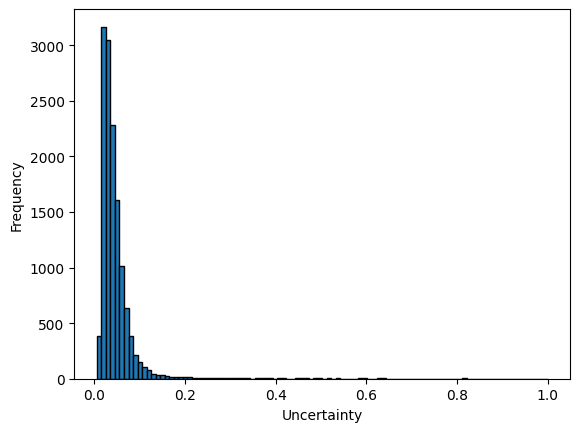

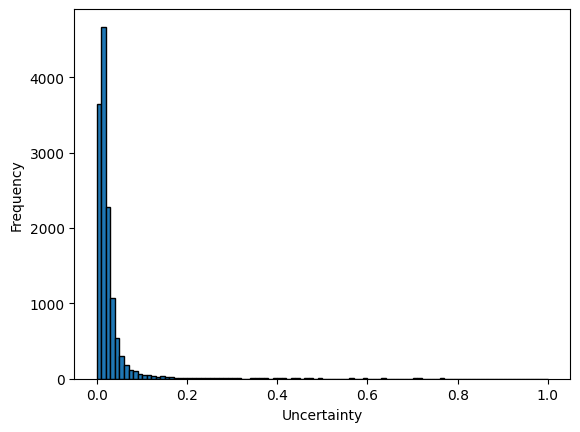

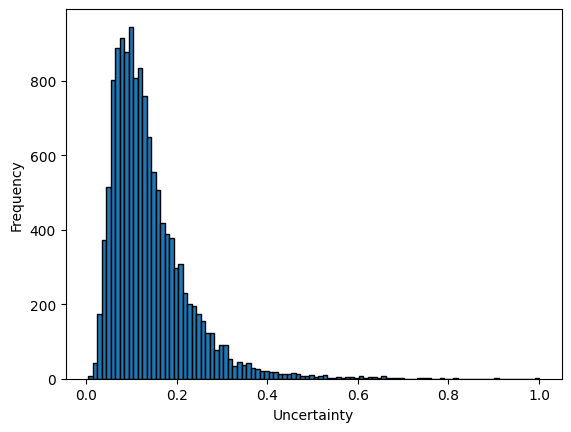

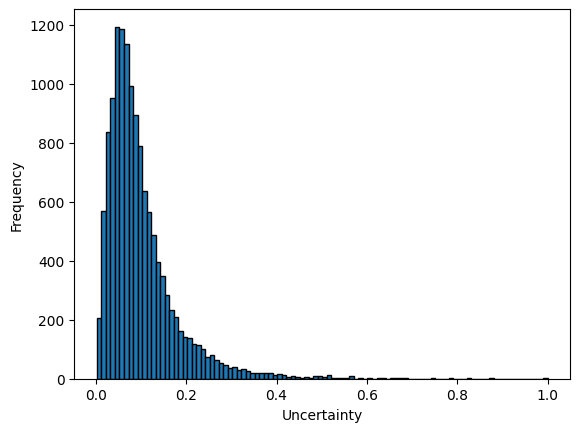

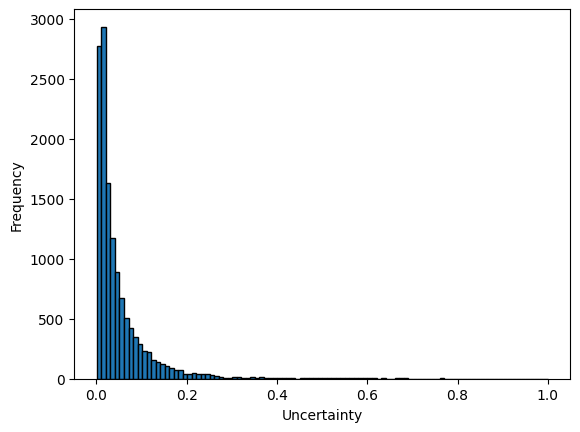

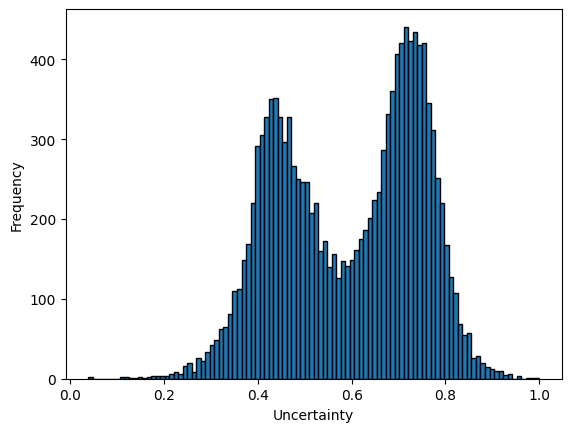

In [54]:
# Create Histogram
for idx in range(7):
    create_histogram(epis[:,idx], bins=100, xlabel='Uncertainty', title= '')

In [ ]:
# Sanity check to make sure the order of stored boxes are right
# Check the frames
print(dbinfos_train_file['Car'][0])
print(infos_train_file[0])
# print(conf_file['pred'][0])
# print(infos_train_unc[-1])
# print(conf_file['pred'][-1])

## DO NOT RUN UNLESS NEEDED!!!
## L2 residual as uncertainty

In [ ]:
sqrd_res = np.sqrt((conf_file['target'] - conf_file['pred'])**2)
print(sqrd_res.shape)

# Perform min-max scaling
for idx in range(7):
    sqrd_res[:, idx] = (sqrd_res[:, idx]-min(sqrd_res[:, idx]))/(max(sqrd_res[:, idx]) - min(sqrd_res[:, idx])) + 1e-3

# Create Histogram
for idx in range(7):
    print(sqrd_res[:,idx].mean())
    print(sqrd_res[:,idx].std())
    create_histogram(sqrd_res[:,idx], bins=100, xlabel='Uncertainty', title= '')

## DO NOT RUN UNLESS NEEDED!!!
## Adding residual as uncertainty to KITTI Infos (for sqrd_res only)

In [ ]:
dbinfos_train_file_new = dbinfos_train_file.copy()
infos_train_file_new = infos_train_file.copy()

for idx in range(len(dbinfos_train_file['Car'])):
    dbinfos_train_file_new['Car'][idx]['uncertainty'] = np.array(sqrd_res[idx], dtype = np.float64)

print(dbinfos_train_file_new['Car'][10])

cntr = 0
for idx in range(len(infos_train_file_new)):
    len_this_idx = len(infos_train_file_new[idx]['annos']['name'])
    infos_train_file_new[idx]['annos']['uncertainty'] = np.array(sqrd_res[cntr:cntr+len_this_idx], dtype = np.float64)
    cntr += len_this_idx

print(infos_train_file_new[100])

In [ ]:
with open("/home/hpaat/my_exp/GLENet/data/kitti/kitti_dbinfos_train_res_unc.pkl", 'wb') as fg:
    pickle.dump(dbinfos_train_file_new, fg)

with open("/home/hpaat/my_exp/GLENet/data/kitti/kitti_infos_train_res_unc.pkl", 'wb') as fh:
    pickle.dump(infos_train_file_new, fh)

## Adding uncertainty values to KITTI Infos Files

In [ ]:
# DUMMY SWEET IGNORE
# epis = np.zeros_like(epis, dtype=np.float32)  #+ np.random.uniform(0, 0.10, size=(13419, 7))
# print(epis)

In [ ]:
# DUMMY SWEET IGNORE
# print(epis.std(0))
# epis_mod = np.power(1/epis, 1/4)
# print(epis_mod.mean(0))
# print(epis_mod.std(0))

In [55]:
dbinfos_train_file_new = dbinfos_train_file.copy()
infos_train_file_new = infos_train_file.copy()

In [56]:
print(len(dbinfos_train_file_new['Car']))
print(epis.shape)

13419
(13419, 7)


In [57]:
for idx in range(len(dbinfos_train_file['Car'])):
    dbinfos_train_file_new['Car'][idx]['uncertainty'] = np.array(epis[idx], dtype = np.float64)

In [58]:
print(dbinfos_train_file_new['Car'][-15])

{'name': 'Car', 'path': 'gt_database/007472_Car_0.bin', 'image_idx': '007472', 'gt_idx': 0, 'box3d_lidar': array([67.48075867,  3.60879683, -0.75700933,  4.18      ,  1.72      ,
        1.43      , -3.18079633]), 'num_points_in_gt': 5, 'difficulty': -1, 'bbox': array([560.57, 179.91, 582.47, 196.8 ], dtype=float32), 'score': -1.0, 'uncertainty': array([0.12340117, 0.04622778, 0.03188102, 0.25095907, 0.14701389,
       0.13614126, 0.77491498])}


In [59]:
cntr = 0
for idx in range(len(infos_train_file_new)):
    len_this_idx = len(infos_train_file_new[idx]['annos']['name'])
    infos_train_file_new[idx]['annos']['uncertainty'] = np.array(epis[cntr:cntr+len_this_idx], dtype = np.float64)
    cntr += len_this_idx

In [60]:
# Sanity check
print(cntr)
print(len(dbinfos_train_file['Car']))
print(infos_train_file_new[10])

13419
13419
{'point_cloud': {'num_features': 4, 'lidar_idx': '000018'}, 'image': {'image_idx': '000018', 'image_shape': array([ 375, 1242], dtype=int32)}, 'calib': {'P2': array([[7.21537720e+02, 0.00000000e+00, 6.09559326e+02, 4.48572807e+01],
       [0.00000000e+00, 7.21537720e+02, 1.72854004e+02, 2.16379106e-01],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.74588400e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), 'R0_rect': array([[ 0.9999239 ,  0.00983776, -0.00744505,  0.        ],
       [-0.0098698 ,  0.9999421 , -0.00427846,  0.        ],
       [ 0.00740253,  0.00435161,  0.9999631 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'Tr_velo_to_cam': array([[ 7.53374491e-03, -9.99971390e-01, -6.16602018e-04,
        -4.06976603e-03],
       [ 1.48024904e-02,  7.28073297e-04, -9.99890208e-01,
        -7.63161778e-02],
       [ 9.99862075e-01,  7.52379000e-03,  1.48075502e-02,
        -2

In [61]:
print(infos_train_file_new[-6]['annos']['uncertainty'])

[[0.06775262 0.0580292  0.02603772 0.15040608 0.12820388 0.05734812
  0.61198473]
 [0.06606802 0.04595364 0.01904787 0.14369367 0.10335493 0.03274534
  0.61769193]
 [0.07599144 0.04551854 0.02156095 0.1556709  0.12439235 0.04748956
  0.61215758]
 [0.09803338 0.08854234 0.02937141 0.21927744 0.1172908  0.02924324
  0.53211075]
 [0.03261089 0.04469471 0.00812899 0.05993189 0.05380609 0.0096275
  0.87153667]
 [0.05589486 0.0634377  0.01869504 0.10129751 0.10275134 0.02195192
  0.80035639]
 [0.14376225 0.08065616 0.05133908 0.26596418 0.26568413 0.1031424
  0.52414346]]


In [62]:
# SAVE the new dbinfos train and infos train files for training in the OpenPCDet source code
with open("/home/hpaat/my_exp/GLENet/data/kitti/kitti_dbinfos_train_new.pkl", 'wb') as fg:
    pickle.dump(dbinfos_train_file_new, fg)

with open("/home/hpaat/my_exp/GLENet/data/kitti/kitti_infos_train_new.pkl", 'wb') as fh:
    pickle.dump(infos_train_file_new, fh)

# Uncertainty Evaluation

## Verify Epistemic Spearman Correlation with the Residual

In [47]:
# for i in range(7):
#     print(str(stats.spearmanr(sqrd_res[:,i], np.sqrt((conf_file['target']-conf_file['pred'])**2)[:,i])[0]))

# Spearman rank correlation of uncertainty and L2 norm of the residual
for i in range(7):
    print(str(stats.spearmanr(epis[:,i], np.sqrt((conf_file['target']-conf_file['pred'])**2)[:,i])[0]), end=" ")

0.4637500989549547 0.5573009643771378 0.3972499728813492 0.3286140026105786 0.3146557368490118 0.3906354797194363 0.1598932489517828 

In [ ]:
# beta-l2 residual correlation
for i in range(7):
    print(str(stats.spearmanr(conf_file['beta'][:,i], np.sqrt((conf_file['target']-conf_file['pred'])**2)[:,i])[0]))

In [ ]:
# v-l2 residual correlation
for i in range(7):
    print(str(stats.spearmanr(conf_file['v'][:,i], np.sqrt((conf_file['target']-conf_file['pred'])**2)[:,i])[0]))

In [ ]:
# alpha-l2 residual correlation
for i in range(7):
    print(str(stats.spearmanr(conf_file['alpha'][:,i], np.sqrt((conf_file['target']-conf_file['pred'])**2)[:,i])[0]))

## Defining Total Object Uncertainty [CAN IGNORE]

In [ ]:
print(conf_file['pred'].shape)

monig = {}
init_pred = conf_file['pred'][:,0].copy()
init_v = conf_file['v'][:,0].copy()
init_alpha = conf_file['alpha'][:,0].copy()
init_beta = conf_file['beta'][:,0].copy()

for i in range(1,7):
    monig['pred'] = ((init_pred + conf_file['v'][:,i])**(-1)) * (init_v*init_pred + conf_file['v'][:,i]*conf_file['pred'][:,i])
    monig['alpha'] = init_alpha + conf_file['alpha'][:,i] + 0.50
    monig['v'] = init_v + conf_file['v'][:,i]
    monig['beta'] = init_beta + conf_file['beta'][:,i] + 0.50*init_v*(init_pred - monig['pred'])**2 + 0.50*conf_file['v'][:,i]*(conf_file['pred'][:,i]- monig['pred'])**2 
    init_pred = monig['pred'].copy()
    init_v =  monig['v'].copy()
    init_alpha =  monig['alpha'].copy()
    init_beta =  monig['beta'].copy()

In [ ]:
print(monig)

In [ ]:
unc_whole = monig['beta'] / (monig['v'] * (monig['alpha'] - 1))

In [ ]:
print(unc_whole)

In [ ]:
unc_whole = (unc_whole-min(unc_whole)) / (max(unc_whole) - min(unc_whole)) + 1e-3

In [ ]:
# Determine outliers and remove them
# Calculate quartiles
q1 = np.percentile(unc_whole, 25)
q3 = np.percentile(unc_whole, 95)

# Calculate the IQR
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = [x for x in unc_whole if x < lower_bound or x > upper_bound]

# Print the outliers
print("Outliers:", len(outliers))
print((unc_whole<lower_bound).sum())
print(upper_bound, '\n')

unc_whole[unc_whole>upper_bound] = upper_bound

In [ ]:
unc_whole = (unc_whole-min(unc_whole)) / (max(unc_whole) - min(unc_whole)) + 1e-6

In [ ]:
create_histogram(unc_whole, bins=100, xlabel='Uncertainty', title= '')

## Negative Log Likelihood

In [48]:
# Iterate over all observations
def calc_nll(kappa, conf_file, epis, lim=1994):         #1994
    nll_final_7 = []
    for i in range(7):
        nll_temp = -stats.norm.logpdf(conf_file['target'][:lim,i],
                                    loc = conf_file['pred'][:lim,i], 
                                    scale = epis[:lim,i]**(1/kappa[i])) #2.7183**(-kappa[i]* epis[:lim,i])) # 

        nll_final_7.append(np.mean(nll_temp))

    # print(nll_final_7)
    return nll_final_7               

In [49]:
# Find optimal factor that minimizes NLL
import numpy as np
final_nll = [100]*7
final_i = [0]*7
for i in np.arange(1,10,0.01):
    result = calc_nll([i]*7, conf_file, epis) #,lim=50000) # NOTE limit modified
    for j,nll in enumerate(result):
        if nll < final_nll[j]:
            final_nll[j] = nll
            final_i[j] = i

print(final_nll)
print(final_i)

[-0.7395291924588939, -1.7966664709284623, -2.7139296913565003, -0.8456615564872605, -1.5082201452220487, -2.322914802963969, 1.10342142038215]
[3.360000000000002, 2.6600000000000015, 1.4600000000000004, 1.2500000000000002, 1.0, 1.0, 2.0500000000000007]


In [50]:
# Redefine epis
saved_kappa = False
if saved_kappa:
    kappa = [9.990000000000007, 5.610000000000004, 2.110000000000001, 2.220000000000001, 1.6300000000000006, 1.6200000000000006, 3.8900000000000023] # medlu-500 do not delete
else:
    kappa = final_i.copy()
for i in range(7):
    epis[:,i] = epis[:,i]**(1/kappa[i])

In [51]:
print(type(epis))
for i in epis:
    print(i)
    break

<class 'numpy.ndarray'>
[0.06726924 0.01797246 0.00870755 0.10611138 0.05074953 0.01758058
 0.7401668 ]


In [63]:
# Save epis to text
for row in epis:
    with open("/home/hpaat/my_exp/GLENet_v3/data/kitti/testing/unc_0004.txt", "a") as file:
        file.write(" ".join([str(row[j]) for j in range(7)]))
        file.write("\n")

In [65]:
with open("/home/hpaat/my_exp/GLENet_v3/data/kitti/testing/unc_0004.txt", "r") as file:
    cc = file.readlines()

In [68]:
print(cc)

unc_xy = []
for val in cc:
    unc_x, unc_y = val.split()[0], val.split()[1]
    unc_xy.append([float(unc_x), float(unc_y)])
print(unc_xy)


['0.26788718 0.1284177 0.022445235 0.214534 0.22426355 0.043070633 0.16110861\n', '0.2876432 0.14041018 0.041423704 0.2254729 0.1703868 0.056326825 0.06639446\n', '0.29648992 0.1407559 0.05010515 0.21796723 0.15367031 0.07298579 0.050519362\n', '0.29182884 0.20756415 0.054898832 0.3869741 0.26786372 0.101061046 0.3226272\n', '0.26657936 0.12933503 0.02257391 0.2039136 0.21530297 0.044327363 0.14932798\n', '0.25360742 0.120645836 0.024905263 0.15795384 0.10933058 0.034166876 0.06390777\n', '0.28702927 0.13992581 0.042596187 0.20194209 0.14400835 0.061320793 0.05115197\n', '0.30390927 0.21911404 0.07281354 0.43616056 0.37359354 0.13531385 0.821592\n', '0.2517318 0.1267463 0.025050027 0.19038944 0.13347705 0.043169007 0.11742521\n', '0.25934082 0.12091912 0.025650963 0.1430608 0.098816514 0.037544053 0.04413131\n', '0.29086474 0.15330791 0.044324234 0.30181772 0.23992391 0.07404152 0.21688116\n', '0.26588833 0.13136096 0.03177501 0.16053215 0.11556227 0.043414656 0.047824167\n', '0.280010

In [52]:
import properscoring as ps
# Calculate CRPS
lim = 50000
for i in range(7):
    print(ps.crps_gaussian(conf_file['target'][:lim,i], 
                    conf_file['pred'][:lim,i],  
                    epis[:lim,i]).mean(), end=" ")

0.18891776 0.0733324 0.016994929 0.13487239 0.041829463 0.02634087 0.3300488 

In [53]:
# Calculate NLL on the entire training dataset 
all_ones = [1] * 7
print(calc_nll(all_ones, conf_file, epis, lim=50000), end=" ")

[7.334404930448682, 1.121354836861077, -1.8993195756379326, 0.9353513820751551, -1.1347795491255777, -0.7887986842140027, 1.0750300120543872] 

In [ ]:
# HYPERPARAMETER FOR THE WHOLE TRAINING DATA
# MEDL-U
# 1: [1.8916779608917593, 0.36809608759642537, -1.7675250460577996, 1.0118631013098256, -0.970061202928357, -1.1995424102378232, 1.257268771946169] CHECK
# 2: [1.825286467336317, 0.5185895890092543, -1.030445882459965, 0.07405658627213153, -0.5500430400538349, -0.8445233412170869, 0.8993105384895271] 
# 3: [1.816468022215171, 0.6636960972299727, -0.3910369981887675, 0.31591179901985383, -0.07394111771881011, -0.26886930491055566, 0.9800660989791639] 

#1.5iqr [2.9836013982741396, -0.7257483185789653, -1.4007537963723797, 0.5824424538905885, -0.5800258687200076, -0.8165559384425344, 4.248328724793688] 
#4.5iqr [3.6419537820284194, -0.6416248620564736, -1.507133545764, 0.7241091089349138, -0.8025371616513934, -0.9128795481207492, 4.156937396511666] 
#6iqr   [3.8383088385725093, -0.5669571134663834, -1.5608485441032358, 0.7736074953514998, -0.8125239731051168, -0.9486104791708864, 3.9667013030985157] 
#8iqr   [4.092201303047635, -0.5049773343643155, -1.5973073491018837, 0.8083864138213941, -0.8766649696196862, -0.9619316400681239, 3.711214245096322] 
#10iqr  [4.240735519473552, -0.45436974166176064, -1.6214750982481039, 0.8469450220159161, -0.8965202023572193, -0.966736631439208, 3.438662245728042] 

# NO OUTLIER REMOVED
# [2.564728291910733, 0.2139111194123225, -1.7761116564408617, 0.8654339560687011, -0.8979566441970577, -1.0400875302165888, 2.9752760842297916] 

# TRANSITION FROM 1 to OPTIMAL:
# OPTIMAL FACTOR: [6.810000000000005, 1.1300000000000001, 1.1300000000000001, 1.5000000000000004, 1.1600000000000001, 1.1700000000000002, 1.6600000000000006]
# OPTIMAL NLL: [1.8132241697676386, 0.34512175559710895, -2.0609452950769445, -0.03239638423379769, -1.2380928483102418, -1.6777669876192918, 0.8831652149147372]


# no multiloss no iou 
# [6.4429382785899625, 1.5963120165131757, -1.774869101282641, 0.9351202699962041, -0.8609176107095616, -0.5588928115236125, 2.733516695314039] 
# [2.1873997306918476, 0.3444917682138197, -1.7111052696575662, 0.6114028136830387, -1.0744279801441308, -1.0293473645593496, 2.942066727543684] 




# MCDO
# NO OUTLIER REMOVED
# [3.0515182429418486, 3.352756929716658, 2.7387841827674717, 11.938571137835693, 3.21300018917621, -0.49485147580083255, 14.204717714755883] 

# CONF
# NO OUTLIER REMOVED
# [4.340099662187645, 1.752480354847797, -1.8777142842875898, 4.105971368057867, 1.6979318699638553, -1.3706581794657013, 9.647335435319908] 

# Ensemble
# 1: [4.403579778010997, 0.07493490450071723, -1.4959248701215937, 0.5913755337036962, -1.2249633047217738, -0.7144308775683946, 0.9235981195900996] 
# 2: [1.5606964551344864, -0.05994793303699632, -0.5669022426156356, -0.01165989304650495, -0.41798664593671947, -1.032132389249797, 1.0071659340538337] CHECK
# 3: [1.4251483090847685, 0.25126205771380883, -0.07895930234411103, 0.26744425536496186, 0.02176178757594511, -0.39290818105637326, 1.059838794626867]

#1.5iqr [2.1682312717439767, -0.5920600798779405, -1.1807851696468707, 0.07619226048902793, 0.016091786442423876, -1.4854572783107984, 0.922830315404245]
#10iqr  [3.5223038595464797, -0.3784027182205729, -1.4341608383037232, 0.5578446351018669, -0.2136971942765518, -1.0431823589148623, 0.922830315404245] 

# NO OUTLIER REMOVED
# [4.060729401505149, -0.149740109665844, -1.43966024816947, 0.557200123059915, -0.948043484114098, -1.0270545130545827, 0.9228576722450789]

# TRANSITION FROM 1 to OPTIMAL:
# OPTIMAL FACTOR: [3.5100000000000025, 1.3000000000000003, 1.05, 1.4000000000000004, 1.06, 1.2200000000000002, 1.0]
# OPTIMAL NLL: [1.419099890151247, -0.3249343429612282, -1.516931273811882, -0.19390358845041608, -1.273428217963031, -1.8891258188115523, 0.9235981195900996]

In [ ]:
# 200 Frames
# 8.3.v3
# [4.288674361965199, 0.2589242681056312, -1.7130448735593966, 0.3893145876103043, -0.8592942704672661, -0.8127927737403137, 0.6405865156262938]

In [ ]:
# 125 Frames
# 8.4.v2
# [5.943013707956682, 0.40020882926632706, -1.5653226620475253, 0.3088395493592805, -0.9332622601417606, -1.0512136532320229, 0.8304838609452505]
# [9.990000000000007, 7.300000000000006, 2.4000000000000012, 3.990000000000003, 1.8800000000000008, 1.6600000000000006, 9.990000000000007]